In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from taz_scripts import preprocess
import math
plt.style.use("ggplot")

# Income - Task 2


In [2]:
clean_green_households_2020 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_households_2020.csv")
rising_tides_households_2020 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_households_2020.csv")

In [3]:
clean_green_households_2020.head(5)

,household_id,base_income_octile,base_income_quartile,bldgsz,bucketbin,building_id,h0004,h0511,h1215,h1617,...,taz,tenure,unittype,vehicl,unit_num,unit_id,tmnode_id,node_id,income_quartile,zone_id
0,91784,2,1,2,7,9,0,0,0,0,...,1434,rent,0,1,0,3,8178,286070,1,1434
1,23338,1,1,2,1,13,0,0,0,0,...,1434,own,0,3,0,6,1419,287534,1,1434
2,457339,1,1,2,1,16,0,0,0,0,...,1419,own,0,3,0,9,5285,292825,1,1419
3,579815,2,1,2,1,20,0,0,0,0,...,1419,own,0,2,0,13,7881,286464,1,1419
4,579800,2,1,2,6,21,0,0,0,0,...,1419,own,0,1,0,14,5285,285222,1,1419


In [4]:
rising_tides_households_2020.head(5)

,household_id,base_income_octile,base_income_quartile,bldgsz,bucketbin,building_id,h0004,h0511,h1215,h1617,...,taz,tenure,unittype,vehicl,unit_num,unit_id,tmnode_id,node_id,income_quartile,zone_id
0,91784,2,1,2,7,9,0,0,0,0,...,1434,rent,0,1,0,3,8178,286070,1,1434
1,23338,1,1,2,1,13,0,0,0,0,...,1434,own,0,3,0,6,1419,287534,1,1434
2,457339,1,1,2,1,16,0,0,0,0,...,1419,own,0,3,0,9,5285,292825,1,1419
3,579815,2,1,2,1,20,0,0,0,0,...,1419,own,0,2,0,13,7881,286464,2,1419
4,579800,2,1,2,6,21,0,0,0,0,...,1419,own,0,1,0,14,5285,285222,1,1419


In [5]:
preprocess(clean_green_households_2020)

In [6]:
preprocess(rising_tides_households_2020)

In [7]:
clean_green_households_2020.head()

,household_id,base_income_octile,base_income_quartile,bldgsz,bucketbin,building_id,h0004,h0511,h1215,h1617,...,unit_num,unit_id,tmnode_id,node_id,income_quartile,zone_id,county_name,county_value,subregion_name,subregion_value
0,91784,2,1,2,7,9,0,0,0,0,...,0,3,8178,286070,1,1434,Marin,9,North Bay,5
1,23338,1,1,2,1,13,0,0,0,0,...,0,6,1419,287534,1,1434,Marin,9,North Bay,5
2,457339,1,1,2,1,16,0,0,0,0,...,0,9,5285,292825,1,1419,Marin,9,North Bay,5
3,579815,2,1,2,1,20,0,0,0,0,...,0,13,7881,286464,1,1419,Marin,9,North Bay,5
4,579800,2,1,2,6,21,0,0,0,0,...,0,14,5285,285222,1,1419,Marin,9,North Bay,5


In [8]:
rising_tides_households_2020.head()

,household_id,base_income_octile,base_income_quartile,bldgsz,bucketbin,building_id,h0004,h0511,h1215,h1617,...,unit_num,unit_id,tmnode_id,node_id,income_quartile,zone_id,county_name,county_value,subregion_name,subregion_value
0,91784,2,1,2,7,9,0,0,0,0,...,0,3,8178,286070,1,1434,Marin,9,North Bay,5
1,23338,1,1,2,1,13,0,0,0,0,...,0,6,1419,287534,1,1434,Marin,9,North Bay,5
2,457339,1,1,2,1,16,0,0,0,0,...,0,9,5285,292825,1,1419,Marin,9,North Bay,5
3,579815,2,1,2,1,20,0,0,0,0,...,0,13,7881,286464,2,1419,Marin,9,North Bay,5
4,579800,2,1,2,6,21,0,0,0,0,...,0,14,5285,285222,1,1419,Marin,9,North Bay,5


In [9]:
def get_subregion_income_percentiles(data, bins=[0.2, 0.4, 0.6, 0.8]):
    """
    Creates a pivot table that breaks down each subregion into percentiles
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing household-level information. 
        Must have `income`, `subregion_name` columns (generated using preprocess())
    
    bins : list or array-like
        Desired percentiles to compute (default is 20, 40, 60, 80th percentiles)
        
    Returns
    -------
    pd.DataFrame that captures divisions in income by subregion
    
    """
    bins = np.array(bins)
    
    # Group by subregion, then compute percentiles for each subregion
    percentiles = pd.DataFrame(data.groupby('subregion_name')['income'].quantile(bins)).reset_index()
    percentiles.columns = ["subregion_name", "percentiles", "values"]
    
    # Generate pivot table
    percentiles=pd.pivot_table(index = "subregion_name", columns= "percentiles", values = "values", data = percentiles)
    percentiles.columns = ['{}th pct'.format(i*100) for i in bins]
    
    # Reorder rows based on subregion value
    subregions = ['San Francisco', 'Peninsula', 'South Bay', 'East Bay', 'North Bay', 'Others']
    percentiles = percentiles.reindex(subregions)
    
    return percentiles

In [10]:
def get_bay_area_income_percentiles(data, bins=[0.2, 0.4, 0.6, 0.8]):
    """
    Creates a pivot table that finds percentile divisions across the entire Bay Area (all households)
    
    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing household-level information. 
        Must have `income`, `subregion_name` columns (generated using preprocess())
    
    bins : list or array-like
        Desired percentiles to compute (default is 20, 40, 60, 80th percentiles)
        
    Returns
    -------
    pd.DataFrame that captures divisions in income across the entire Bay Area
    
    """
    bins = np.array(bins)
    
    bay_area = pd.DataFrame(data['income'].quantile(bins).reset_index())
    bay_area.columns = ['percentile', 'income']
    bay_area = bay_area.set_index('percentile')
    
    return bay_area

In [11]:
#income ranges
[clean_green_households_2020["income"].min(), clean_green_households_2020["income"].max()]


[-20000, 1968504]

In [12]:
#income ranges
[rising_tides_households_2020["income"].min(), rising_tides_households_2020["income"].max()]


[-20000, 1968504]

In [13]:
clean_green_subregion_percentiles = get_subregion_income_percentiles(clean_green_households_2020)
clean_green_subregion_percentiles

,20.0th pct,40.0th pct,60.0th pct,80.0th pct
subregion_name,,,,
San Francisco,18100.0,41100.0,71000.0,122200.0
Peninsula,36000.0,66090.0,102600.0,150000.0
South Bay,24400.0,50000.0,81800.0,130100.0
East Bay,23200.0,46000.0,74300.0,119510.0
North Bay,24400.0,44800.0,69600.0,108710.0
Others,39500.0,80500.0,130000.0,201300.0


In [14]:
rising_tides_subregion_percentiles = get_subregion_income_percentiles(rising_tides_households_2020)
rising_tides_subregion_percentiles

,20.0th pct,40.0th pct,60.0th pct,80.0th pct
subregion_name,,,,
San Francisco,15400.0,35300.0,60000.0,110900.0
Peninsula,30440.0,58000.0,92280.0,142000.0
South Bay,21270.0,42500.0,70000.0,120100.0
East Bay,20080.0,39800.0,64120.0,109600.0
North Bay,22000.0,39100.0,60900.0,100000.0
Others,34300.0,67400.0,120000.0,186990.0


/home/ec2-user/horizon/.env/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


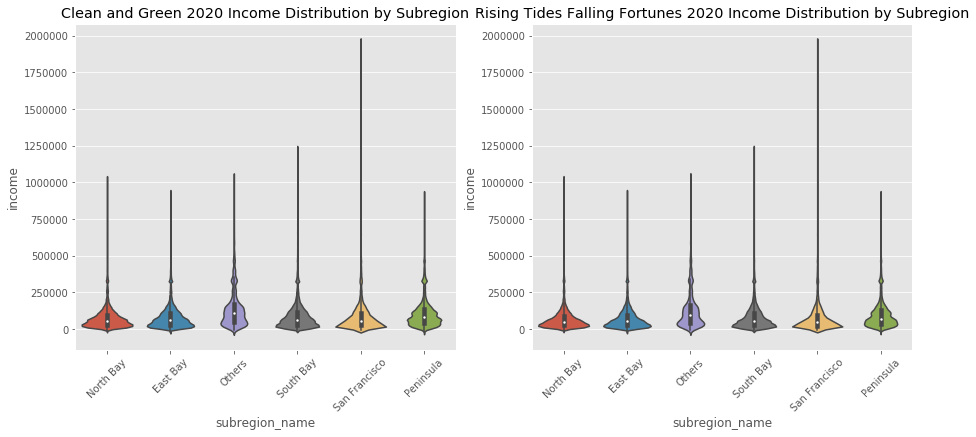

In [15]:
#Comparison of Income Distributions
fig, ax1 = plt.subplots(1, 2, figsize = (15, 6));

sns.violinplot(x="subregion_name", y="income", data=clean_green_households_2020, ax=ax1[0]);
ax1[0].set_title("Clean and Green 2020 Income Distribution by Subregion");
ax1[0].tick_params(axis='x', rotation=45);

sns.violinplot(x="subregion_name", y="income", data=rising_tides_households_2020, ax = ax1[1]);
ax1[1].tick_params(axis='x', rotation=45);
ax1[1].set_title("Rising Tides Falling Fortunes 2020 Income Distribution by Subregion");

In [16]:
# removing outliers past $300,000
threshold = 500000
no_outliers_cg_2020 = clean_green_households_2020[clean_green_households_2020["income"] < threshold]
no_outliers_rt_2020 = rising_tides_households_2020[rising_tides_households_2020["income"] < threshold]

In [17]:
1 - (no_outliers_cg_2020.shape[0] / clean_green_households_2020.shape[0])
#top .4% of the bay area

0.0040036126508166126

In [18]:
1 - (no_outliers_rt_2020.shape[0]/ rising_tides_households_2020.shape[0])
#top .3% of the bay area

0.0034047490404051084

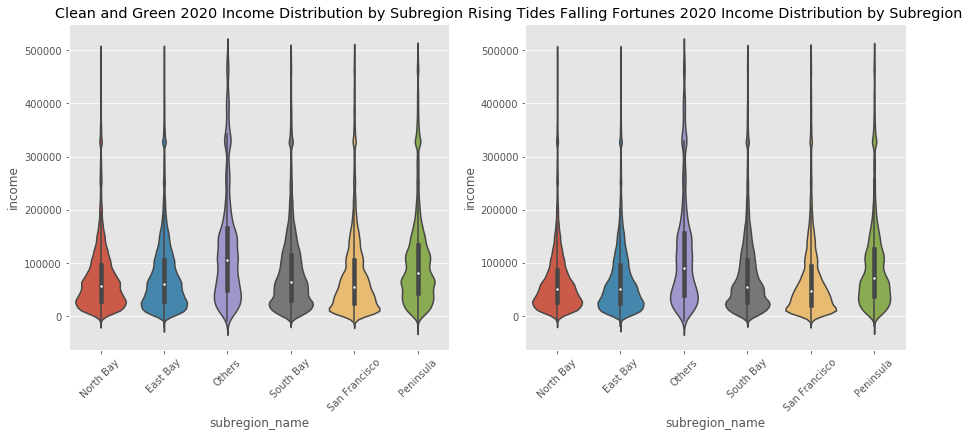

In [19]:
#Comparison of Income Distributions
fig, ax1 = plt.subplots(1, 2, figsize = (15, 6));

sns.violinplot(x="subregion_name", y="income", data=no_outliers_cg_2020, ax=ax1[0]);
ax1[0].set_title("Clean and Green 2020 Income Distribution by Subregion");
ax1[0].tick_params(axis='x', rotation=45);

sns.violinplot(x="subregion_name", y="income", data=no_outliers_rt_2020, ax = ax1[1]);
ax1[1].tick_params(axis='x', rotation=45);
ax1[1].set_title("Rising Tides Falling Fortunes 2020 Income Distribution by Subregion");

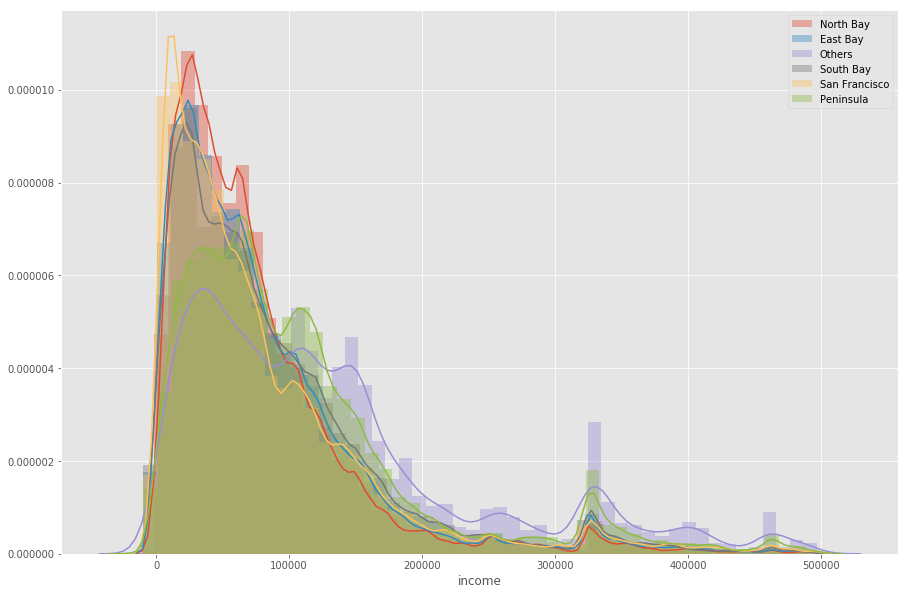

In [20]:
#overlayed histogram
plt.figure(figsize=(15, 10))
for i in no_outliers_cg_2020["subregion_name"].unique():
    sns.distplot(no_outliers_cg_2020[no_outliers_cg_2020["subregion_name"] == i]["income"], label=i)
plt.legend();

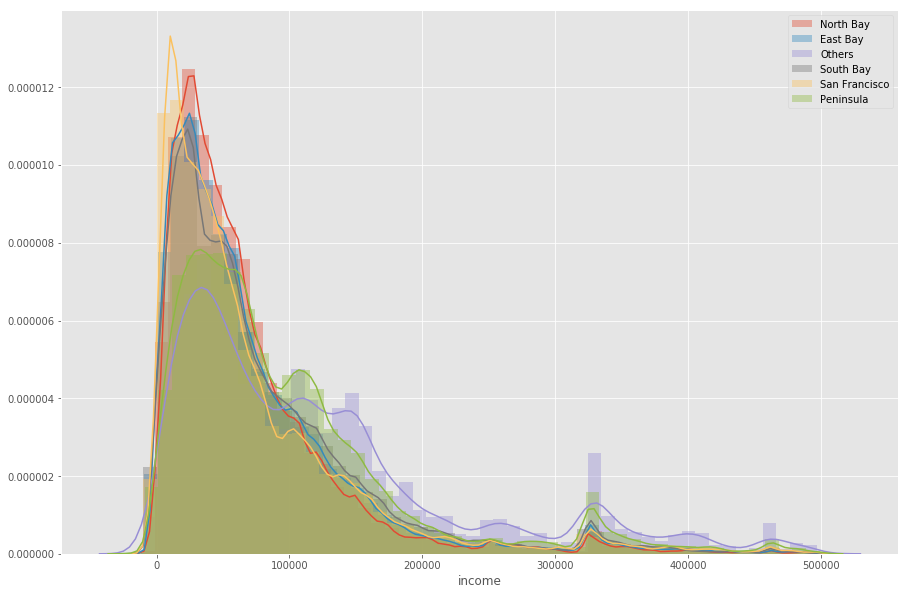

In [21]:
#overlayed histogram
plt.figure(figsize=(15, 10))
for i in no_outliers_rt_2020["subregion_name"].unique():
    sns.distplot(no_outliers_rt_2020[no_outliers_rt_2020["subregion_name"] == i]["income"], label=i)
plt.legend();

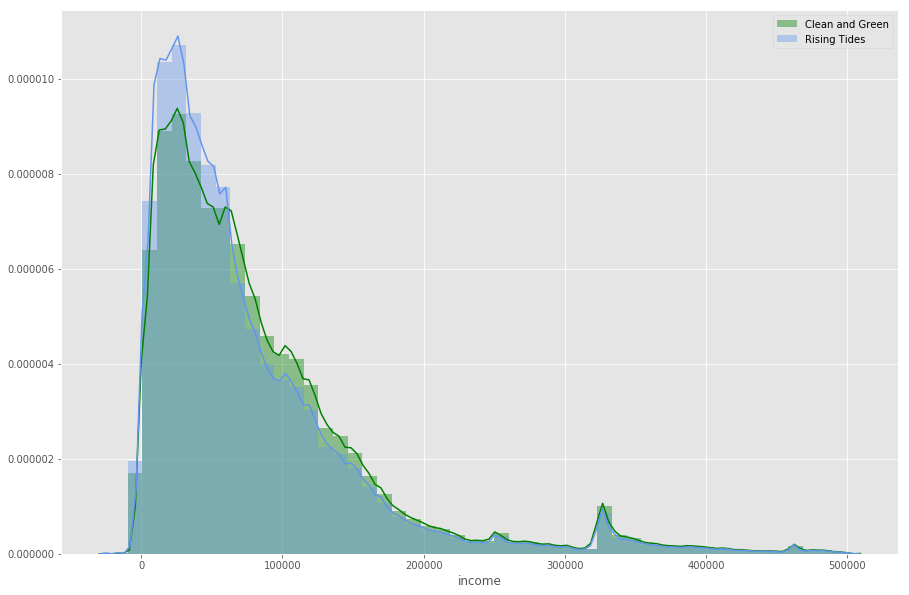

In [22]:
#overlayed histogram
plt.figure(figsize=(15, 10))
sns.distplot(no_outliers_cg_2020["income"], color = "green", label="Clean and Green")
sns.distplot(no_outliers_rt_2020["income"], color = "cornflowerblue", label = "Rising Tides")
plt.legend()

In [23]:
#removing top 1% of earners

In [24]:
num_at_1_cg = math.ceil(clean_green_households_2020.shape[0] * 0.01)
num_at_1_rt = math.ceil(rising_tides_households_2020.shape[0] * 0.01)


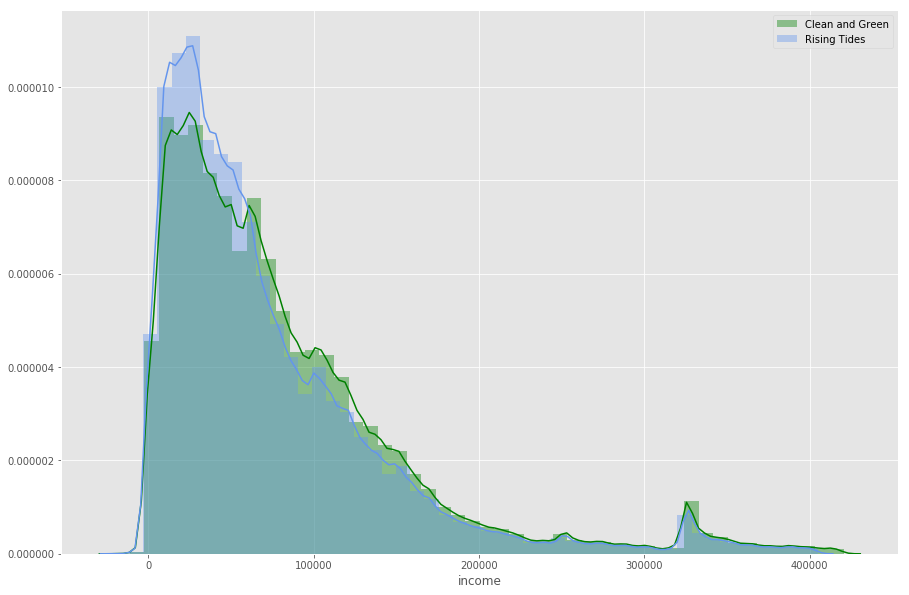

In [25]:
plt.figure(figsize=(15, 10))
sns.distplot(clean_green_households_2020.sort_values(by="income", ascending=False).iloc[num_at_1_cg:]["income"], color = "green", label="Clean and Green")
sns.distplot(rising_tides_households_2020.sort_values(by="income", ascending=False).iloc[num_at_1_rt:]["income"], color = "cornflowerblue", label = "Rising Tides")
plt.legend()


In [26]:
#removing top 0.1% of earners

In [27]:
num_at_01_cg = math.ceil(clean_green_households_2020.shape[0] * 0.001)
num_at_01_rt = math.ceil(rising_tides_households_2020.shape[0] * 0.001)


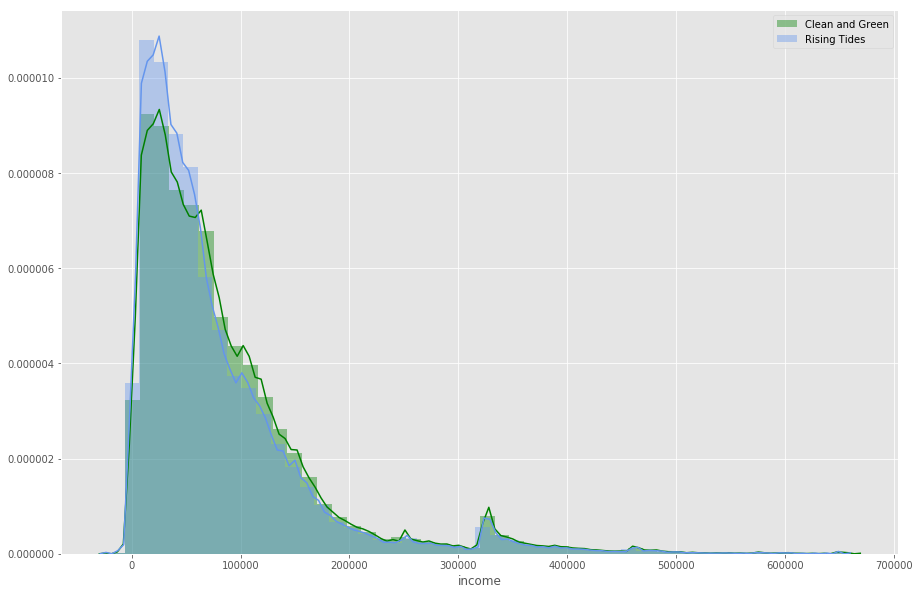

In [28]:
plt.figure(figsize=(15, 10))
sns.distplot(clean_green_households_2020.sort_values(by="income", ascending=False).iloc[num_at_01_cg:]["income"], color = "green", label="Clean and Green")
sns.distplot(rising_tides_households_2020.sort_values(by="income", ascending=False).iloc[num_at_01_rt:]["income"], color = "cornflowerblue", label = "Rising Tides")
plt.legend()


In [29]:
# plot rank against income

In [30]:
no_outliers_cg_2020 = no_outliers_cg_2020.sort_values("income")
no_outliers_rt_2020 = no_outliers_rt_2020.sort_values("income")

In [31]:
no_outliers_cg_2020["rank"] = np.arange(0, no_outliers_cg_2020.shape[0])
no_outliers_rt_2020["rank"] = np.arange(0, no_outliers_rt_2020.shape[0])

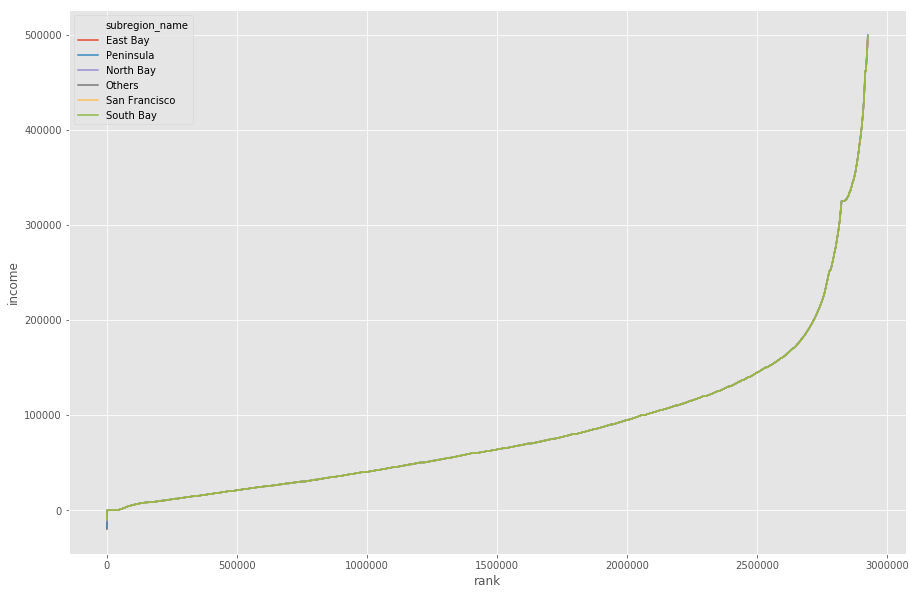

In [35]:
plt.figure(figsize=(15,10))
sns.lineplot(x = "rank", y="income", data = no_outliers_cg_2020.iloc[::50, :], hue="subregion_name")

### Observations
 - all plots have a an extra concentration of income above the 300k mark, peninsulas is more substantial
 - income all right skewed as expected, Peninsula most spread out.  
 - differences in income 
 

In [39]:
clean_green_bay_area = get_bay_area_income_percentiles(clean_green_households_2020).reset_index()
clean_green_bay_area["label"] = np.repeat("Clean Green", 4)

In [40]:
rising_tides_bay_area = get_bay_area_income_percentiles(rising_tides_households_2020).reset_index()
rising_tides_bay_area["label"] = np.repeat("Rising Tides", 4) 

In [46]:
combined_futures = clean_green_bay_area.append(rising_tides_bay_area)
combined_futures

,percentile,income,label
0,0.2,24000.0,Clean Green
1,0.4,48350.0,Clean Green
2,0.6,77900.0,Clean Green
3,0.8,125000.0,Clean Green
0,0.2,21000.0,Rising Tides
1,0.4,41000.0,Rising Tides
2,0.6,67000.0,Rising Tides
3,0.8,115100.0,Rising Tides


Text(0.5, 1.0, 'Income Percentiles')

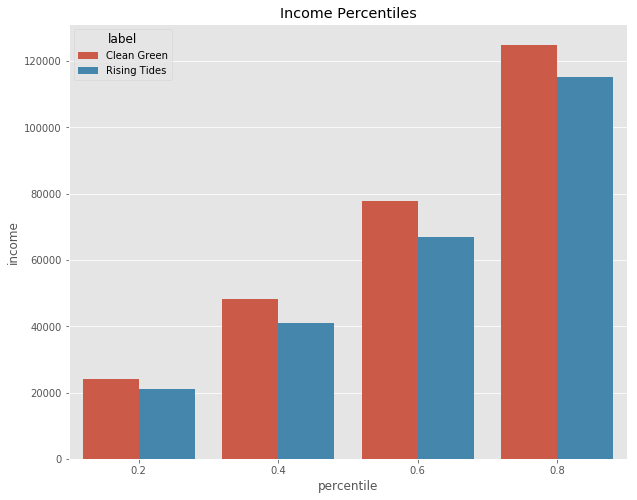

In [51]:
#across the bay area
plt.figure(figsize=(10, 8))
sns.barplot(x = "percentile", y="income", data = combined_futures, hue = "label");
plt.title("Income Percentiles")

In [90]:
#by region
rt_reversed_pivot

,subregion_name,variable,value
0,San Francisco,20.0th pct,15400.0
1,Peninsula,20.0th pct,30440.0
2,South Bay,20.0th pct,21270.0
3,East Bay,20.0th pct,20080.0
4,North Bay,20.0th pct,22000.0
5,Others,20.0th pct,34300.0
6,San Francisco,40.0th pct,35300.0
7,Peninsula,40.0th pct,58000.0
8,South Bay,40.0th pct,42500.0
9,East Bay,40.0th pct,39800.0


In [103]:
def unpivot_subregion_percentiles(df):
    unpivoted = pd.melt(df.reset_index(), id_vars= "subregion_name")
    unpivoted["variable"] = unpivoted["variable"].str.replace("th pct", "").astype(float)
    return unpivoted

In [132]:
#by region
clean_green_2020_melt = unpivot_subregion_percentiles(clean_green_subregion_percentiles)
rising_tides_2020_melt = unpivot_subregion_percentiles(rising_tides_subregion_percentiles)


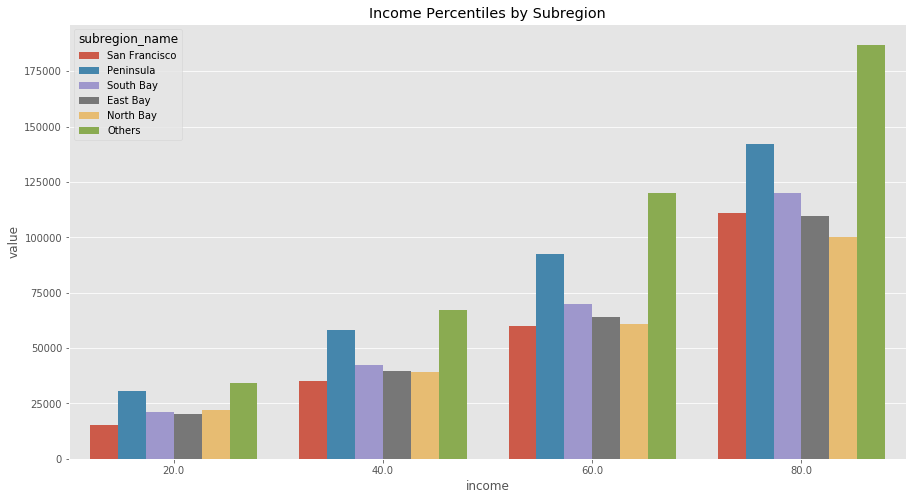

In [133]:
plt.figure(figsize=(15, 8));
sns.barplot(x="variable", y="value", data = rising_tides_2020_melt, hue = "subregion_name");
plt.xlabel("income");
plt.title("Income Percentiles by Subregion");

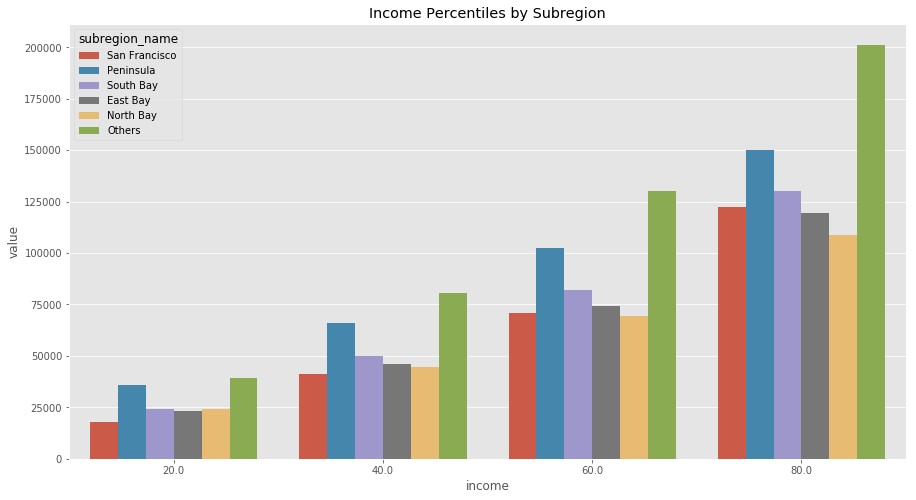

In [134]:
plt.figure(figsize=(15, 8));
sns.barplot(x="variable", y="value", data = clean_green_2020_melt, hue = "subregion_name");
plt.xlabel("income");
plt.title("Income Percentiles by Subregion");


In [ ]:
#average difference between subregions

In [72]:
def top_percentage_thresholds(data, bins = [.50, .80, .9, 0.99]):
    bins = np.array(bins)
    
    percentiles = pd.DataFrame(data.groupby('subregion_name')['income'].quantile(bins)).reset_index()
    percentiles.columns = ["subregion_name", "percentiles", "values"]
    
    # Generate pivot table
    percentiles=pd.pivot_table(index = "subregion_name", columns= "percentiles", values = "values", data = percentiles)
    percentiles.columns = ['{}th pct'.format(i*100) for i in bins]
    
    # Reorder rows based on subregion value
    subregions = ['San Francisco', 'Peninsula', 'South Bay', 'East Bay', 'North Bay', 'Others']
    percentiles = percentiles.reindex(subregions)
    
    return percentiles

In [135]:
top_earners_clean_green = top_percentage_thresholds(clean_green_households_2020)

In [136]:
top_earners_rising_tides = top_percentage_thresholds(rising_tides_households_2020)

In [140]:
top_earners_clean_green = unpivot_subregion_percentiles(top_earners_clean_green)

In [141]:
top_earners_rising_tides = unpivot_subregion_percentiles(top_earners_rising_tides)

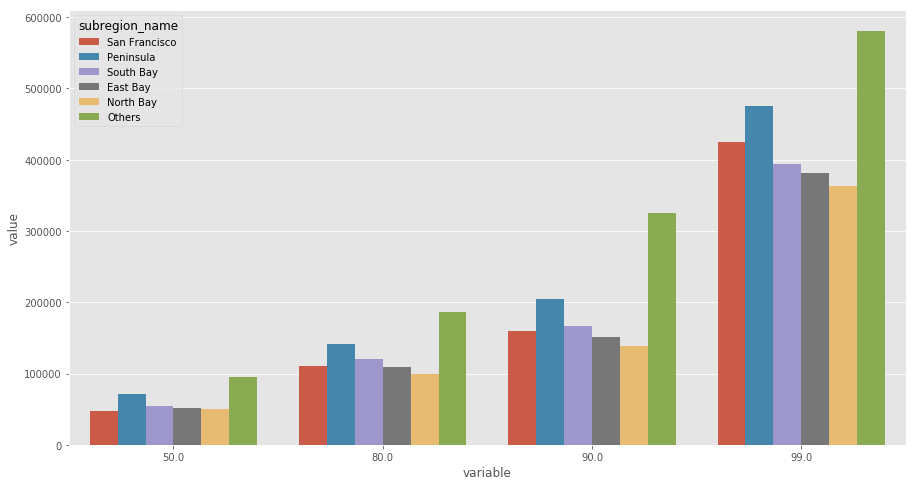

In [156]:
plt.figure(figsize=(15, 8));
earners_rt_plot= sns.barplot(x="variable", y = "value", data = top_earners_rising_tides, hue="subregion_name");

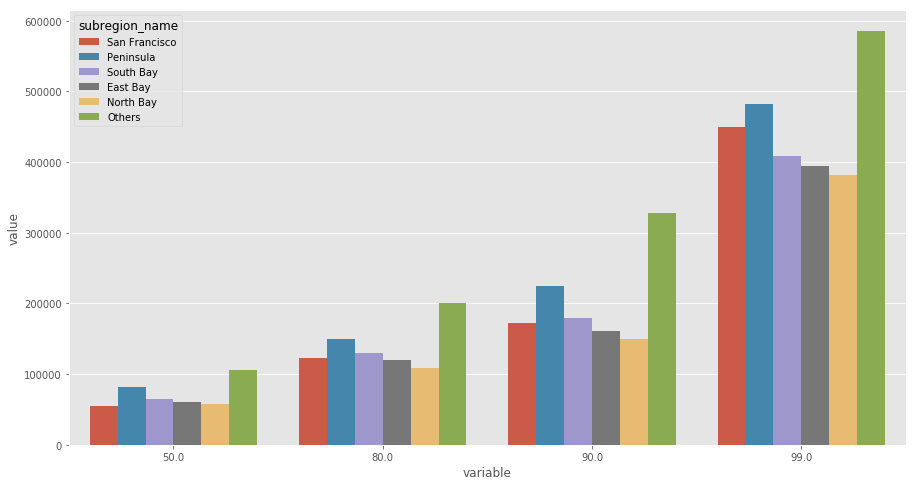

In [169]:
plt.figure(figsize=(15, 8));
earners_rt_plot= sns.barplot(x="variable", y = "value", data = top_earners_clean_green, hue="subregion_name");

In [ ]:
def unpivot_subregion_percentiles(df):
    unpivoted = pd.melt(df.reset_index(), id_vars= "subregion_name")
    unpivoted["variable"] = unpivoted["variable"].str.replace("th pct", "").astype(float)
    return unpivoted

def add_label_subregion_percentiles(df, label):
    labeled = df
    labeled["label"] = np.repeat(label, labeled.shape[0])
    return labeled